In [79]:
# http://www.bogotobogo.com/python/scikit-learn/scikit_machine_learning_Data_Compresssion_via_Dimensionality_Reduction_1_Principal_component_analysis _PCA.php

In [15]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [16]:
import pandas as pd

df_wine = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', 
    header=None)

In [17]:
df_wine.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = \
     train_test_split(X, y, test_size=0.3, random_state=0)
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

In [19]:
covariant_matrix = np.cov(X_train_std.T)

In [20]:
covariant_matrix[0::5]

array([[ 1.00813008,  0.08797701,  0.23066952, -0.32868099,  0.2141631 ,
         0.35576761,  0.2991246 , -0.16913744,  0.09649074,  0.56962271,
        -0.04781543,  0.07403492,  0.63277882],
       [ 0.35576761, -0.30124242,  0.12235533, -0.37018442,  0.16513295,
         1.00813008,  0.88119961, -0.45396901,  0.6196806 , -0.06935051,
         0.45718802,  0.72214462,  0.56326772],
       [-0.04781543, -0.54992807, -0.10928021, -0.25313262,  0.05792599,
         0.45718802,  0.58331869, -0.3178224 ,  0.32282167, -0.52395358,
         1.00813008,  0.60022569,  0.2452794 ]])

In [21]:
eigen_values, eigen_vectors = np.linalg.eig(covariant_matrix)

In [22]:
eigen_values, eigen_vectors[::5]

(array([ 4.8923083 ,  2.46635032,  1.42809973,  1.01233462,  0.84906459,
         0.60181514,  0.52251546,  0.08414846,  0.33051429,  0.29595018,
         0.16831254,  0.21432212,  0.2399553 ]),
 array([[  1.46698114e-01,   5.04170789e-01,  -1.17235150e-01,
           2.06254611e-01,  -1.87815947e-01,  -1.48851318e-01,
          -1.79263662e-01,  -5.54687162e-02,  -4.03054922e-01,
          -4.17197583e-01,   2.75660860e-01,   4.03567189e-01,
           4.13320786e-04],
        [  3.89344551e-01,   9.36399132e-02,   1.80804417e-01,
           1.93179478e-01,   1.40645426e-01,   1.22248798e-02,
           5.31455344e-02,  -4.21265116e-01,   1.35111456e-01,
          -2.80985650e-01,   2.83897644e-01,  -6.18600153e-01,
           9.45645138e-02],
        [  3.00325353e-01,  -2.79243218e-01,   9.32387182e-02,
           2.41740256e-02,  -3.72610811e-01,   2.16515349e-01,
          -3.84654748e-01,  -1.05383688e-01,  -5.17259438e-01,
           1.97814118e-01,  -1.98844532e-01,  -2.0045638

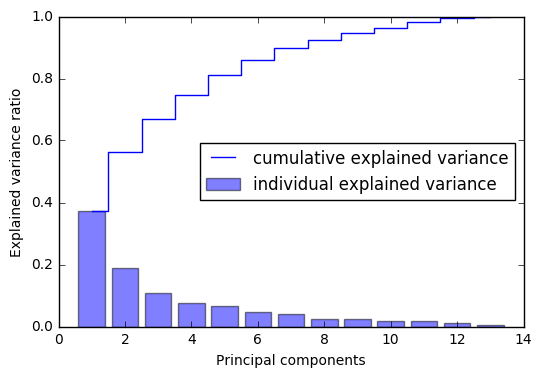

In [25]:
tot = sum(eigen_values)
var_exp = [(i / tot) for i in sorted(eigen_values, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

bar(range(1,14), var_exp, alpha=0.5, align='center',
                  label='individual explained variance')
step(range(1,14), cum_var_exp, where='mid',
                  label='cumulative explained variance')
ylabel('Explained variance ratio')
xlabel('Principal components')
legend(loc='best')
show()

In [26]:
eigen_pairs = \
[(np.abs(eigen_values[i]),eigen_vectors[:,i]) for i in range(len(eigen_values))]
eigen_pairs.sort(reverse=True)

In [27]:
eigen_pairs[:5]

[(4.8923083032737509,
  array([ 0.14669811, -0.24224554, -0.02993442, -0.25519002,  0.12079772,
          0.38934455,  0.42326486, -0.30634956,  0.30572219, -0.09869191,
          0.30032535,  0.36821154,  0.29259713])),
 (2.4663503157592306,
  array([ 0.50417079,  0.24216889,  0.28698484, -0.06468718,  0.22995385,
          0.09363991,  0.01088622,  0.01870216,  0.03040352,  0.54527081,
         -0.27924322, -0.174365  ,  0.36315461])),
 (1.4280997275048455,
  array([-0.11723515,  0.14994658,  0.65639439,  0.58428234,  0.08226275,
          0.18080442,  0.14295933,  0.17223475,  0.1583621 , -0.14242171,
          0.09323872,  0.19607741, -0.09731711])),
 (1.0123346209044966,
  array([ 0.20625461,  0.1304893 ,  0.01515363, -0.09042209, -0.83912835,
          0.19317948,  0.14045955,  0.33733262, -0.1147529 ,  0.07878571,
          0.02417403,  0.18402864,  0.05676778])),
 (0.8490645933450266,
  array([-0.18781595,  0.56863978, -0.29920943, -0.04124995, -0.02719713,
          0.14064543

In [28]:
w= np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
w.shape

(13, 2)

In [29]:
w

array([[ 0.14669811,  0.50417079],
       [-0.24224554,  0.24216889],
       [-0.02993442,  0.28698484],
       [-0.25519002, -0.06468718],
       [ 0.12079772,  0.22995385],
       [ 0.38934455,  0.09363991],
       [ 0.42326486,  0.01088622],
       [-0.30634956,  0.01870216],
       [ 0.30572219,  0.03040352],
       [-0.09869191,  0.54527081],
       [ 0.30032535, -0.27924322],
       [ 0.36821154, -0.174365  ],
       [ 0.29259713,  0.36315461]])

In [30]:
X_train_std[0]

array([ 0.91083058, -0.46259897, -0.01142613, -0.82067872,  0.06241693,
        0.58820446,  0.93565436, -0.7619138 ,  0.13007174, -0.51238741,
        0.65706596,  1.94354495,  0.93700997])

In [31]:
X_train_std[0].dot(w)

array([ 2.59891628,  0.00484089])

In [32]:
X_train_pca = X_train_std.dot(w)
X_train_std.shape, w.shape, X_train_pca.shape

((124, 13), (13, 2), (124, 2))

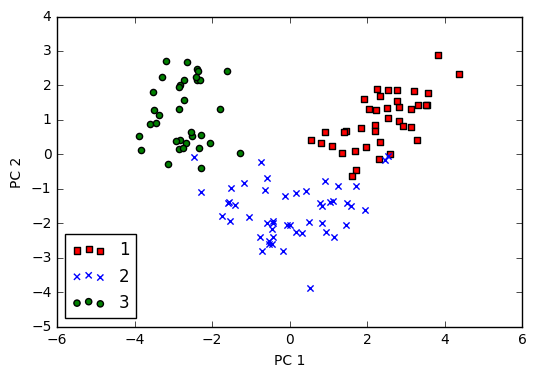

In [33]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
    scatter(X_train_pca[y_train==l, 0], X_train_pca[y_train==l, 1],
            c=c, label=l, marker=m)
xlabel('PC 1')
ylabel('PC 2')
legend(loc='lower left')
show()

In [37]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    xlim(xx1.min(), xx1.max())
    ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx),
                marker=markers[idx], label=cl)

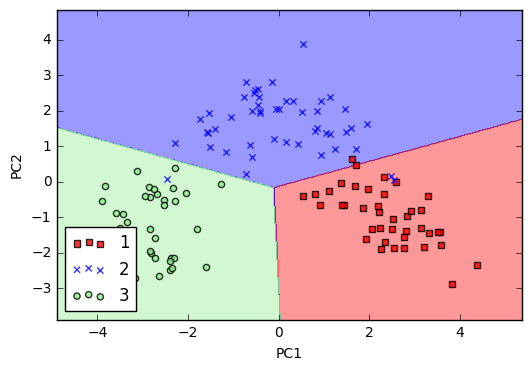

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
lr = LogisticRegression()
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
lr.fit(X_train_pca, y_train)
plot_decision_regions(X_train_pca, y_train, classifier=lr)
xlabel('PC1')
ylabel('PC2')
legend(loc='lower left')
show()